## Ideas
- Can we use morphological parameters as features for classification with Machine Learning?

In [32]:
!pip install -U photutils
!pip install -U scipy
!pip install -U xgboost
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 826 kB 7.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 354 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 69 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!tar -xvzf drive/MyDrive/splus_images/splus_galmasked.tar.gz
!tar -xvzf drive/MyDrive/splus_images/splus_original.tar.gz

Streaming output truncated to the last 5000 lines.
galmask_cut_non_jelly_sample/ESO501-7_F378_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_F395_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_F410_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_F430_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_F515_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_F660_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_F861_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_G_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_I_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_R_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_U_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/ESO501-7_Z_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/IC1993_F378_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/IC1993_F395_450px.fits_galmask.fits
galmask_cut_non_jelly_sample/I

In [2]:
!ls drive/MyDrive/splus_images/*list

drive/MyDrive/splus_images/need_to_exclude_jelly.list
drive/MyDrive/splus_images/need_to_exclude_nonjelly_control.list
drive/MyDrive/splus_images/need_to_exclude_nonjelly_sample.list


In [1]:
import numpy as np
import glob
from astropy.io import fits

import matplotlib.pyplot as plt

In [2]:
with open('drive/MyDrive/splus_images/need_to_exclude_jelly.list') as f:
  ej = f.read().splitlines()
  exclude_jelly = []
  for i in range(len(ej)):
    exclude_jelly = exclude_jelly + glob.glob('galmask_cut_jelly_candidates/' + ej[i] + '_galmask.fits')
  exclude_jelly = list(set(exclude_jelly))
with open('drive/MyDrive/splus_images/need_to_exclude_nonjelly_sample.list') as f:
  enjs = f.read().splitlines()
  exclude_njelly_sample = []
  for i in range(len(enjs)):
    exclude_njelly_sample = exclude_njelly_sample + glob.glob('galmask_cut_non_jelly_sample/' + enjs[i] + '_galmask.fits')
  exclude_njelly_sample = list(set(exclude_njelly_sample))
with open('drive/MyDrive/splus_images/need_to_exclude_nonjelly_control.list') as f:
  enjc = f.read().splitlines()
  exclude_njelly_control = []
  for i in range(len(enjc)):
    exclude_njelly_control = exclude_njelly_control + glob.glob('galmask_cut_non_jelly_control/' + enjc[i] + '_galmask.fits')
  exclude_njelly_control = list(set(exclude_njelly_control))

In [3]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/SPLUS_jellyfish_candidates.csv')

jclasses = []
rjimg_list = glob.glob('/content/galmask_cut_jelly_candidates/*_F660_*.fits')

for img in rjimg_list:
  galname = img.split('/')[3].split('_')[0]
  row = df[df['Name'] == galname]
  jclasses.append(int(row['JClass']))

with open("jclasses.txt", "w") as f:
  for item in jclasses:
    f.write(f"{item}\n")

In [4]:
len(exclude_jelly), len(exclude_njelly_control), len(exclude_njelly_sample)

(81, 20, 58)

In [5]:
!ls cut_non_jelly_sample | wc -l
!ls galmask_cut_non_jelly_sample | wc -l

!ls cut_non_jelly_control | wc -l
!ls galmask_cut_non_jelly_control | wc -l

912
906
780
776


In [6]:
jdata = []
njdata = []
labels = []

for img in glob.glob('galmask_cut_jelly_candidates/*_F660_*_galmask.fits'):
  name = img.split('/')[1].split('_')[0]

  if img in exclude_jelly:
    continue

  arr = np.arcsinh(fits.getdata(img)).ravel()
  jdata.append(arr)

  row = df[df['Name'] == name]
  if row['JClass'].iloc[0] == 1:
    labels.append(1)
  if row['JClass'].iloc[0] == 2:
    labels.append(2)
  if row['JClass'].iloc[0] == 3:
    labels.append(3)
  if row['JClass'].iloc[0] == 4:
    labels.append(4)

for img in glob.glob('galmask_cut_non_jelly_sample/*_F660_*_galmask.fits'):
  if img in exclude_njelly_sample:
    continue
  arr = np.arcsinh(fits.getdata(img)).ravel()
  njdata.append(arr)
  labels.append(0)

for img in glob.glob('galmask_cut_non_jelly_control/*_F660_*_galmask.fits'):
  if img in exclude_njelly_control:
    continue
  arr = np.arcsinh(fits.getdata(img)).ravel()
  njdata.append(arr)
  labels.append(0)

jdata = np.vstack(jdata)
njdata = np.vstack(njdata)
# labels = [1] * jdata.shape[0] + [0] * njdata.shape[0]

In [7]:
jdata.shape, njdata.shape, len(labels)

((82, 122500), (134, 122500), 216)

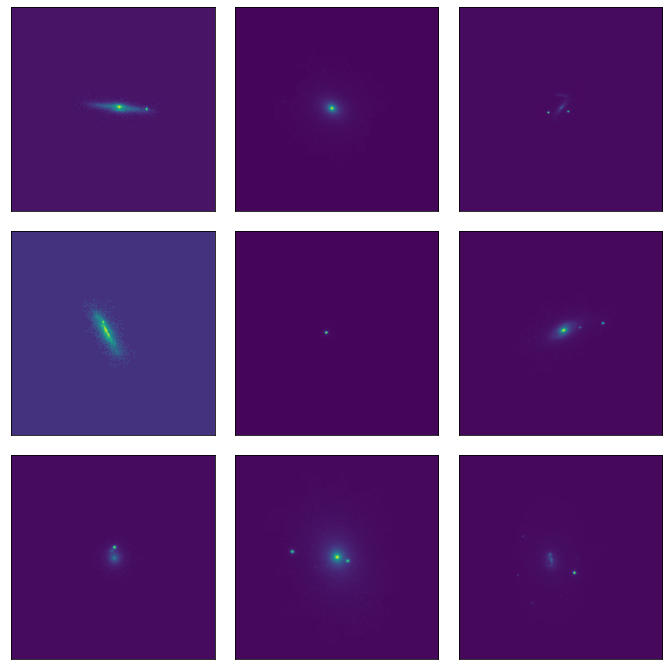

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
  for j in range(3):
    njind = np.random.choice(np.arange(0, njdata.shape[0]), 1)
    ax[i, j].imshow(njdata[njind].reshape(350, 350), origin='lower')
    ax[i, j].axes.xaxis.set_visible(False)
    ax[i, j].axes.yaxis.set_visible(False)

plt.subplots_adjust(
                    wspace=0.01, 
                    hspace=0.1)

plt.show()

In [9]:
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler

[0.67941546 0.15376437 0.04592152 0.03037936 0.01438634 0.01243309
 0.01174836 0.00500589 0.00479293 0.00401054 0.00336943 0.00293735
 0.00257251 0.00222172 0.00209142 0.00175368 0.00161219 0.00152443
 0.00133171 0.00128689]


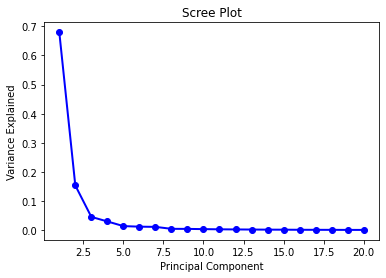

[0.67941546 0.83317983 0.87910135 0.90948071 0.92386705 0.93630014
 0.9480485  0.95305439 0.95784732 0.96185786 0.9652273  0.96816465
 0.97073716 0.97295888 0.9750503  0.97680398 0.97841617 0.9799406
 0.98127231 0.98255919]


In [10]:
data = np.vstack((jdata, njdata))

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=20)
components = pca.fit_transform(data_scaled)

print(pca.explained_variance_ratio_)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print(np.cumsum(pca.explained_variance_ratio_))

In [13]:
pca = PCA(n_components=5)  # using 8 since it explains > 95% variance.
components = pca.fit_transform(data_scaled)
components.shape

(216, 5)

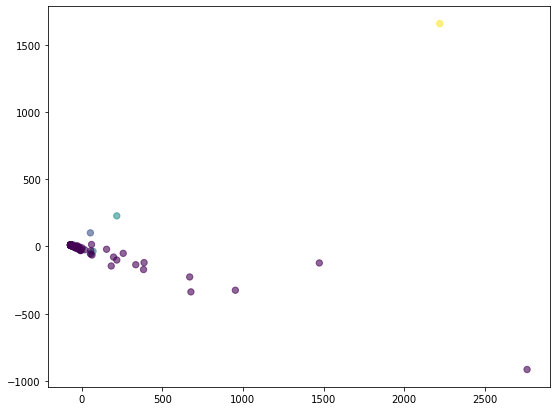

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.scatter(components[:, 0], components[:, 1], c=labels, s=40, alpha=0.6);

Before starting, there is an important consideration as to whether we only care with the final classifications or on the predicted probabilities. Since jellyfish have different classes among themselves, we are more interested in the latter. Here we use the cross-entropy loss since it used in many cases as teh default, although there are several options.

In [24]:
from sklearn.metrics import log_loss

## Supervised learning on flattened images

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb

In [38]:
datadf = pd.DataFrame(data)
datadf.columns = [str(datadf.columns[i]) for i in range(datadf.shape[1])]

print(datadf.shape)

datadf['labels'] = labels

In [13]:
np.unique(datadf['labels'])

array([0, 1, 2, 3, 4])

Change JClass 1 and 2 to non-jellyfish and rename JClass 3 and 4 as a single label "1".

In [14]:
sum(datadf['labels'] == 1), sum(datadf['labels'] == 2), sum(datadf['labels'] == 3), sum(datadf['labels'] == 4)

(26, 36, 13, 7)

In [40]:
# fg = [
#   62,
#   156,
#   51,
#   46,
#   111,
#   34,
#   169,
#   208,
#   0,
#   50,
#   14,
#   22,
# ]
# for ff in fg:
#   print(datadf.iloc[ff]['labels'])

In [16]:
datadf.loc[datadf['labels'] == 1, 'labels'] = 1
datadf.loc[datadf['labels'] == 2, 'labels'] = 1
datadf.loc[datadf['labels'] == 3, 'labels'] = 1
datadf.loc[datadf['labels'] == 4, 'labels'] = 1

print(np.unique(datadf['labels']))

[0 1]


In [17]:
sum(datadf['labels']) / len(datadf['labels'])

0.37962962962962965

In [18]:
(datadf['labels'] == 0).sum(), (datadf['labels'] == 1).sum()

(134, 82)

In [19]:
X = datadf[datadf.columns[:-1]]
y = datadf['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

print(sum(y_train / len(y_train)))
print(sum(y_test / len(y_test)))

0.37790697674418644
0.3863636363636363


In [20]:
ratio = float(np.sum(np.array(y) == 0)) / np.sum(np.array(y) == 1)
ratio

1.6341463414634145

In [21]:
sum(y_test == 0), sum(y_test == 1)

(27, 17)

In [22]:
for i in X_test.index:
  if i in X_train.index:
    print("data leak")

**Q) Should I be using eval_set in fitting and then using it again for conf matrix, roc curve, etc? Is it fine?**

In [25]:
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic', seed=42, eval_metric=log_loss, early_stopping_rounds=10, scale_pos_weight=ratio, max_delta_step=1,
    learning_rate=0.01, gamma=0.3
)
clf_xgb.fit(X_train, y_train,
            verbose=True,
            eval_set=[(X_test, y_test)]
)

[0]	validation_0-logloss:0.69201	validation_0-log_loss:0.69201
[1]	validation_0-logloss:0.68976	validation_0-log_loss:0.68976
[2]	validation_0-logloss:0.68621	validation_0-log_loss:0.68621
[3]	validation_0-logloss:0.68487	validation_0-log_loss:0.68487
[4]	validation_0-logloss:0.68270	validation_0-log_loss:0.68270
[5]	validation_0-logloss:0.68070	validation_0-log_loss:0.68070
[6]	validation_0-logloss:0.67756	validation_0-log_loss:0.67756
[7]	validation_0-logloss:0.67630	validation_0-log_loss:0.67630
[8]	validation_0-logloss:0.67454	validation_0-log_loss:0.67454
[9]	validation_0-logloss:0.67244	validation_0-log_loss:0.67244
[10]	validation_0-logloss:0.67055	validation_0-log_loss:0.67055
[11]	validation_0-logloss:0.66929	validation_0-log_loss:0.66929
[12]	validation_0-logloss:0.66767	validation_0-log_loss:0.66767
[13]	validation_0-logloss:0.66600	validation_0-log_loss:0.66600
[14]	validation_0-logloss:0.66509	validation_0-log_loss:0.66509
[15]	validation_0-logloss:0.66193	validation_0-log

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=<function log_loss at 0x7f966e14eb00>, gamma=0.3,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=1, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

In [26]:
from sklearn.metrics import confusion_matrix
pred_label = clf_xgb.predict(X_test)
pred_prob = clf_xgb.predict_proba(X_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installed plot-metric!


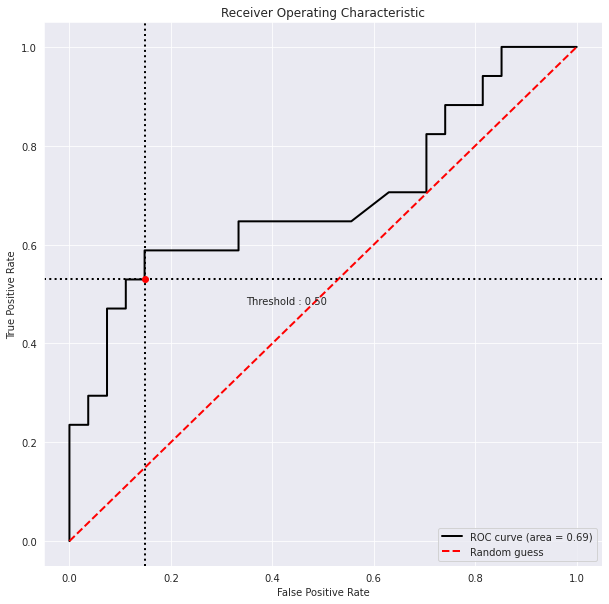

In [27]:
import matplotlib.pyplot as plt
try:
  from plot_metric.functions import BinaryClassification
except ImportError:
  !pip install plot-metric
  print("Installed plot-metric!")
  from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test, pred_prob[:, 1], labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

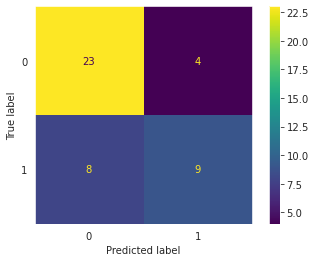

In [28]:
# bc.plot_confusion_matrix();
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confmat = confusion_matrix(y_test, pred_label)
confusion_matrix(y_test, pred_label, labels=[0, 1])
cmatd = ConfusionMatrixDisplay(confmat)
cmatd.plot()
plt.grid(b=None)
plt.show()

,True Class,Predicted Proba,Predicted Type,Predicted Class
4,1,0.516707,TP,Class 2
62,1,0.435507,FN,Class 1
198,0,0.452020,TN,Class 1
188,0,0.413611,TN,Class 1
103,0,0.457482,TN,Class 1
105,0,0.457602,TN,Class 1
184,0,0.431327,TN,Class 1
168,0,0.441512,TN,Class 1
174,0,0.487503,TN,Class 1
156,0,0.514533,FP,Class 2


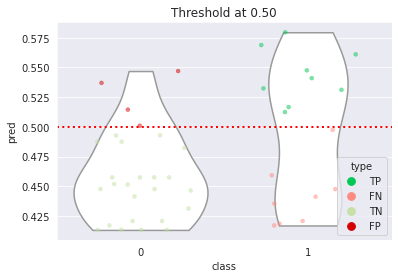

In [29]:
bc.plot_class_distribution()

In [30]:
pred_prob.shape, X_test.shape, X_train.shape

((44, 2), (44, 122500), (172, 122500))

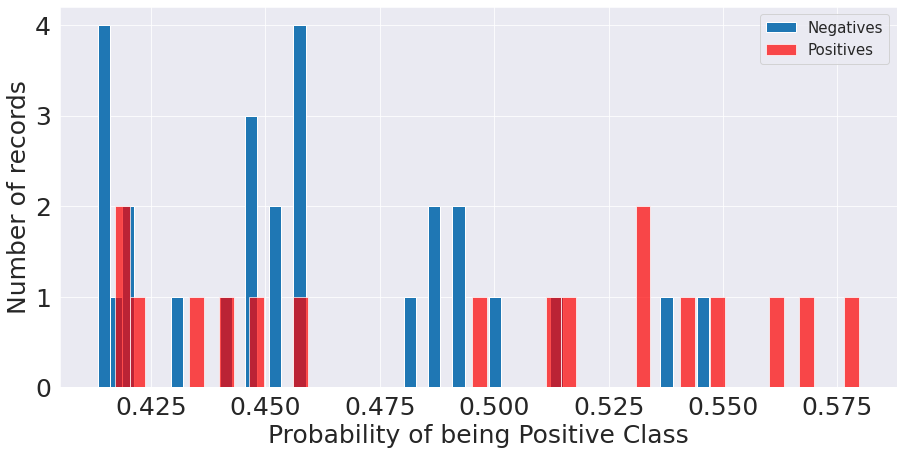

In [31]:
plt.figure(figsize=(15,7))
plt.hist(pred_prob[:, 1][y_test==0], bins=50, label='Negatives')
plt.hist(pred_prob[:, 1][y_test==1], bins=50, label='Positives', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show()

Since we are going to use the above functionalities more often, we will define a function that does it for us.

In [32]:
def get_evaluation(classifier, X_test, y_test):
  from sklearn.metrics import ConfusionMatrixDisplay
  from sklearn.metrics import confusion_matrix

  pred_label = classifier.predict(X_test)
  pred_prob = classifier.predict_proba(X_test)

  bc = BinaryClassification(y_test, pred_prob[:, 1], labels=["Class 1", "Class 2"])
  bc.plot_roc_curve()
  plt.show()

  confmat = confusion_matrix(y_test, pred_label)
  cmatd = ConfusionMatrixDisplay(confmat)
  cmatd.plot()
  plt.grid(b=None)
  plt.show()

  bc.plot_class_distribution()
  plt.show()

  plt.figure(figsize=(15,7))
  plt.hist(pred_prob[:, 1][y_test==0], bins=50, label='Negatives')
  plt.hist(pred_prob[:, 1][y_test==1], bins=50, label='Positives', alpha=0.7, color='r')
  plt.xlabel('Probability of being Positive Class', fontsize=25)
  plt.ylabel('Number of records', fontsize=25)
  plt.legend(fontsize=15)
  plt.tick_params(axis='both', labelsize=25, pad=5)
  plt.show()

  return pred_label, pred_prob

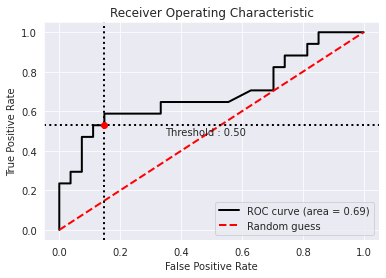

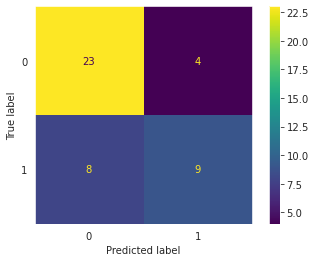

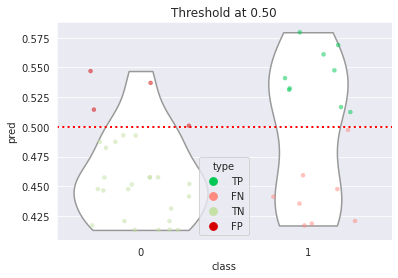

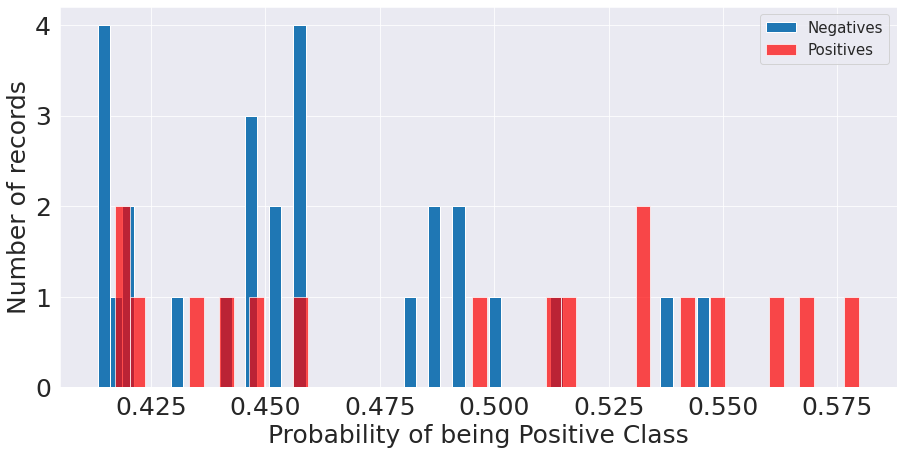

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([[0.483293  , 0.516707  ],
        [0.5644926 , 0.4355074 ],
        [0.5479801 , 0.45201987],
        [0.58638895, 0.41361108],
        [0.54251754, 0.45748246],
        [0.542398  , 0.45760205],
        [0.5686733 , 0.4313267 ],
        [0.5584879 , 0.4415121 ],
        [0.51249737, 0.48750263],
        [0.4854669 , 0.5145331 ],
        [0.5175781 , 0.48242188],
        [0.5523079 , 0.4476921 ],
        [0.4389643 , 0.5610357 ],
        [0.5072638 , 0.49273625],
        [0.5025    , 0.4975    ],
        [0.5828707 , 0.4171293 ],
        [0.42037362, 0.5796264 ],
        [0.5534508 , 0.44654915],
        [0.48750263, 0.51249737],
        [0.54246116, 0.4575388 ],
        [0.4675457 , 0.5324543 ],
        [0.54843366, 0.45156634],
        [0.5866176 , 0.41338244],
        [0.46879172, 0.5312083 ],
        [0.49901384, 0.50098616],


In [33]:
get_evaluation(clf_xgb, X_test, y_test)

In [36]:
# y_test.tolist()
mismatch_inds = []
for i, x in enumerate(zip(y_test.tolist(), pred_label)):
  if x[0] != x[1]:
    mismatch_inds.append(i)

for i in mismatch_inds:
  print(y_test.index[i])

62
156
51
46
111
34
169
208
0
50
14
22


In [34]:
clf_xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': 10,
 'enable_categorical': False,
 'eval_metric': <function sklearn.metrics._classification.log_loss>,
 'gamma': 0.3,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.01,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 1,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1.6341463414634145,
 'seed': 42,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}

Using cross-validation to handle imbalanced data -- to optimize on the hyperparameters.

In [ ]:
# # Takes a lot of time!
# # param_grid = {
# #     'max_depth': [6, 15],
# #     'learning_rate': [0.001, 0.01, 0.1],
# #     'gamma': [0, 0.3],
# #     'reg_lambda': [10, 100],
# # }
# param_grid = {
#     'max_depth': [6],
#     'learning_rate': [0.01],
#     'gamma': [0.3],
#     'reg_lambda': [10],
# }

# optimal_params = GridSearchCV(
#     estimator=xgb.XGBClassifier(objective='binary:logistic',
#                                 seed=42,
#                                 n_jobs=-1,
#                                 subsample=0.9  # # subsample helps in overfitting and save some time -> it uses `subsample` fraction of data randomly.
# ),
#     param_grid=param_grid,
#     scoring='neg_log_loss',
#     cv=3,
#     verbose=True
# )
# optimal_params.fit(X_train,
#                    y_train,
# )
# print(optimal_params.best_params_)

# # To prevent a memory leak warning, need to pass n_jobs=10 to the classifier instead of GridSearchCV.

## Supervised learning on PCA features

In [50]:
fg = [
  62,
129,
15,
9,
35,
188,
146,
58,
94,
177,
83,
80,
143,
]

for ff in fg:
  print(datadf.iloc[ff]['labels'])

3.0
0.0
2.0
1.0
2.0
0.0
0.0
2.0
0.0
0.0
0.0
2.0
0.0


In [41]:
# Setup
data = pd.DataFrame(components)
data['labels'] = labels
data.loc[data['labels'] == 1, 'labels'] = 1
data.loc[data['labels'] == 2, 'labels'] = 1
data.loc[data['labels'] == 3, 'labels'] = 1
data.loc[data['labels'] == 4, 'labels'] = 1

data.columns = [i+1 for i in range(components.shape[1])] + ['labels']
data

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,labels
0,-68.406111,9.628749,20.186182,1.189057,-1.641160,12.971306,7.330652,0.759258,2.319357,0.855106,...,-0.814862,2.649196,2.171726,0.889704,-0.269602,-2.714459,0.634592,-0.478328,0.004616,1
1,-43.329134,-3.640450,2.374022,-4.693751,-3.565079,-10.421360,-9.481794,-0.254819,6.348395,-3.524221,...,2.775055,4.472578,-12.709968,9.440275,-0.554166,0.439543,-15.840973,-3.721372,-2.239057,1
2,-62.382612,6.201121,10.107513,-3.757380,-3.000169,4.617092,3.936731,2.295385,5.698801,-1.409811,...,-3.516521,7.042917,2.913737,8.408947,2.120586,-4.260379,-3.573116,-2.650859,-1.116928,1
3,-66.781260,8.820363,17.305225,2.064495,-1.892391,8.931708,3.889448,-0.616861,1.426912,0.353318,...,-1.731667,-1.614714,1.482773,-1.474916,0.026867,-3.447809,3.199251,-1.868756,-1.587175,1
4,-65.965075,8.129988,16.816948,-0.038706,-4.183522,10.681102,4.543116,2.618686,1.520112,2.079703,...,2.441444,6.841174,4.742541,3.730002,2.174214,-1.212063,-3.264483,0.507777,-2.912664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,-68.015875,9.407497,19.734679,1.112666,-1.337873,11.759720,6.622673,0.424626,2.590904,0.656917,...,-0.385587,1.002502,0.409208,-0.973435,-0.159720,-2.546907,1.298323,-1.642516,-0.449789,0
212,-68.707523,9.775200,20.355452,0.920131,-1.671605,13.033870,7.410728,0.605705,2.273039,0.625767,...,-0.913295,3.062312,2.615735,0.952363,0.236930,-2.774215,0.511031,-1.158833,0.023024,0
213,183.055974,-145.608353,-88.413749,157.571369,-41.229535,-73.349045,-60.079454,19.673616,-156.984742,164.237527,...,-52.742104,-34.725733,-22.284794,111.199724,58.593187,-16.563668,28.299889,15.768408,5.668211,0
214,-60.037358,4.793869,11.159053,1.837807,-6.762114,0.716384,-2.094896,1.684758,-3.264612,5.243346,...,0.899884,-0.073015,0.949099,-1.128736,0.121953,-0.773195,-0.250330,-1.957265,-2.254469,0


In [42]:
np.unique(data['labels'])

array([0, 1])

In [43]:
X = data[data.columns[:-1]]
y = data['labels']
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2, stratify=y)

print(sum(train_y / len(train_y)))
print(sum(valid_y / len(valid_y)))

0.37790697674418644
0.3863636363636363


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


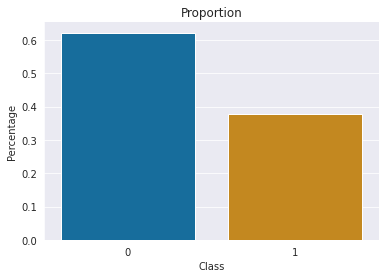

In [44]:
sns.set_palette("colorblind")
ax = sns.barplot(train_y.value_counts().index, train_y.value_counts()/len(train_y))
ax.set_title("Proportion")
ax.set_ylabel("Percentage")
ax.set_xlabel("Class")
sns.despine();

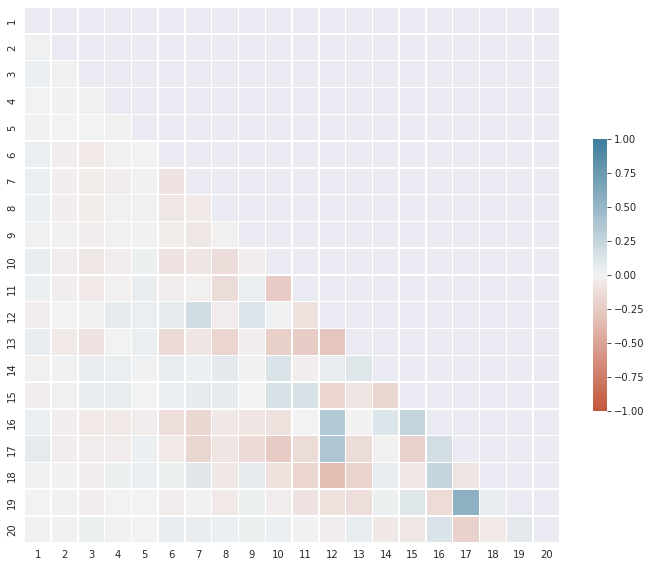

In [45]:
# Next, we plot a diagonal correlation heatmap to see if there are strong correlations between the features

# Compute the correlation matrix
corr = train_x.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Takes a lot of time!
param_grid = {
    'max_depth': [6, 12, 18],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.3, 0.9],
    'reg_lambda': [10, 100],
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                n_jobs=-1,
                                subsample=0.9,  # # subsample helps in overfitting and save some time -> it uses `subsample` fraction of data randomly.
                                early_stopping_rounds=10,
                                scale_pos_weight=ratio,
                                max_delta_step=1
),
    param_grid=param_grid,
    scoring='neg_log_loss',
    cv=3,
    verbose=True
)
optimal_params.fit(train_x,
                   train_y,
                   eval_set=[(valid_x, valid_y)]
)
print(optimal_params.best_params_)

# To prevent a memory leak warning, need to pass n_jobs=-1 to the classifier instead of GridSearchCV.

Streaming output truncated to the last 5000 lines.
[38]	validation_0-logloss:0.67843
[39]	validation_0-logloss:0.67796
[40]	validation_0-logloss:0.67779
[41]	validation_0-logloss:0.67722
[42]	validation_0-logloss:0.67669
[43]	validation_0-logloss:0.67623
[44]	validation_0-logloss:0.67618
[45]	validation_0-logloss:0.67590
[46]	validation_0-logloss:0.67539
[47]	validation_0-logloss:0.67481
[48]	validation_0-logloss:0.67443
[49]	validation_0-logloss:0.67424
[50]	validation_0-logloss:0.67379
[51]	validation_0-logloss:0.67364
[52]	validation_0-logloss:0.67314
[53]	validation_0-logloss:0.67281
[54]	validation_0-logloss:0.67258
[55]	validation_0-logloss:0.67232
[56]	validation_0-logloss:0.67242
[57]	validation_0-logloss:0.67211
[58]	validation_0-logloss:0.67201
[59]	validation_0-logloss:0.67200
[60]	validation_0-logloss:0.67186
[61]	validation_0-logloss:0.67179
[62]	validation_0-logloss:0.67168
[63]	validation_0-logloss:0.67116
[64]	validation_0-logloss:0.67080
[65]	validation_0-logloss:0.670

In [47]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.9,
                            learning_rate=0.01,
                            max_depth=6,
                            reg_lambda=10.0,
                            scale_pos_weight=ratio,
                            subsample=0.9,
                            early_stopping_rounds=10,
                            eval_metric=log_loss,
)
clf_xgb.fit(train_x,
            train_y,
            verbose=True,
            eval_set=[(valid_x, valid_y)])

[0]	validation_0-logloss:0.69232	validation_0-log_loss:0.69232
[1]	validation_0-logloss:0.69101	validation_0-log_loss:0.69101
[2]	validation_0-logloss:0.69033	validation_0-log_loss:0.69033
[3]	validation_0-logloss:0.68943	validation_0-log_loss:0.68943
[4]	validation_0-logloss:0.68875	validation_0-log_loss:0.68875
[5]	validation_0-logloss:0.68798	validation_0-log_loss:0.68798
[6]	validation_0-logloss:0.68714	validation_0-log_loss:0.68714
[7]	validation_0-logloss:0.68544	validation_0-log_loss:0.68544
[8]	validation_0-logloss:0.68436	validation_0-log_loss:0.68436
[9]	validation_0-logloss:0.68346	validation_0-log_loss:0.68346
[10]	validation_0-logloss:0.68204	validation_0-log_loss:0.68204
[11]	validation_0-logloss:0.68108	validation_0-log_loss:0.68108
[12]	validation_0-logloss:0.68005	validation_0-log_loss:0.68005
[13]	validation_0-logloss:0.67957	validation_0-log_loss:0.67957
[14]	validation_0-logloss:0.67840	validation_0-log_loss:0.67840
[15]	validation_0-logloss:0.67787	validation_0-log

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=<function log_loss at 0x7f966e14eb00>, gamma=0.9,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=10.0, ...)

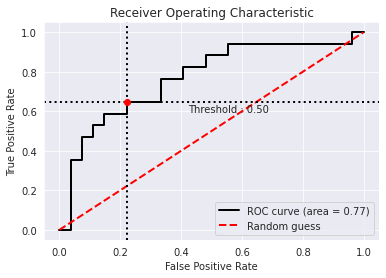

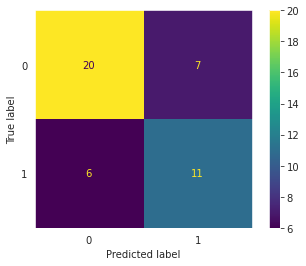

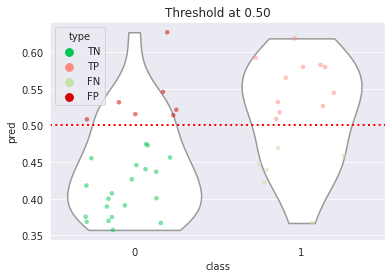

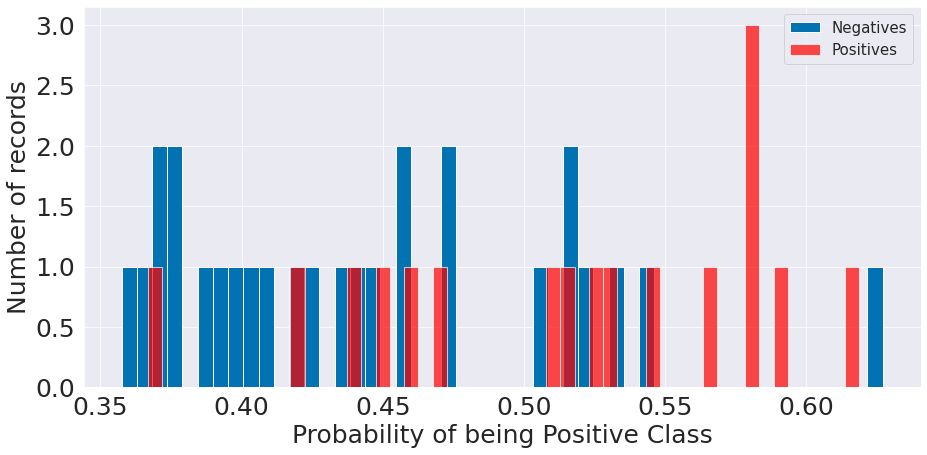

In [48]:
pred_label, pred_prob = get_evaluation(clf_xgb, valid_x, valid_y)

In [49]:
# y_test.tolist()
mismatch_inds = []
for i, x in enumerate(zip(valid_y.tolist(), pred_label)):
  if x[0] != x[1]:
    mismatch_inds.append(i)

for i in mismatch_inds:
  print(valid_y.index[i])

62
129
15
9
35
188
146
58
94
177
83
80
143


## XGBoost on UMAP features

In [57]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import umap

In [59]:
# def draw_umap(data, labels, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
#     fit = umap.UMAP(
#         n_neighbors=n_neighbors,
#         min_dist=min_dist,
#         n_components=n_components,
#         metric=metric
#     )
#     u = fit.fit_transform(data);
#     fig = plt.figure()
#     if n_components == 1:
#         ax = fig.add_subplot(111)
#         ax.scatter(u[:,0], range(len(u)), c=labels)
#     if n_components == 2:
#         ax = fig.add_subplot(111)
#         ax.scatter(u[:,0], u[:,1], c=labels)
#     if n_components == 3:
#         ax = fig.add_subplot(111, projection='3d')
#         ax.scatter(u[:,0], u[:,1], u[:,2], c=labels, s=100)
#     plt.title(title, fontsize=18)

# umap_data = datadf[datadf.columns[:-1]]
# draw_umap(umap_data, datadf['labels'], title='n_neighbors=15')
# draw_umap(umap_data, datadf['labels'], n_neighbors=30, title='n_neighbors=30')

In [85]:
umap_data = datadf[datadf.columns[:-1]]
umap_data['labels'] = labels
umap_data.loc[umap_data['labels'] == 1, 'labels'] = 1
umap_data.loc[umap_data['labels'] == 2, 'labels'] = 1
umap_data.loc[umap_data['labels'] == 3, 'labels'] = 1
umap_data.loc[umap_data['labels'] == 4, 'labels'] = 1
umap_data

,0,1,2,3,4,5,6,7,8,9,...,122491,122492,122493,122494,122495,122496,122497,122498,122499,labels
0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,1
1,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,1
2,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,1
4,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0
212,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0
213,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
214,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0


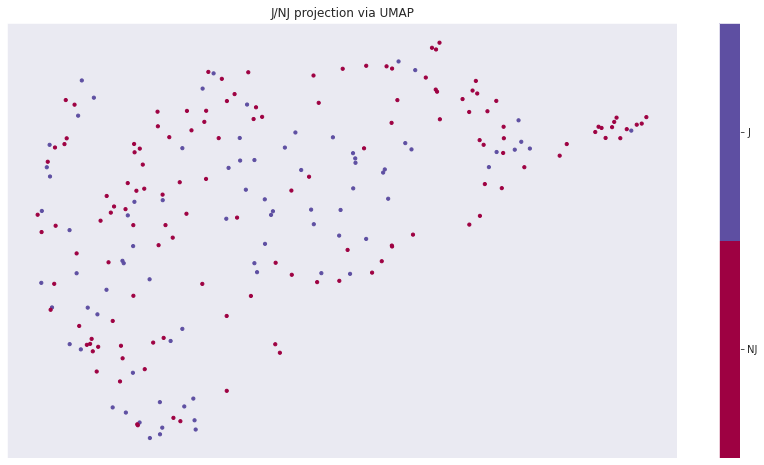

In [87]:
classes = [
           'NJ',
           'J'
]
fit = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric='manhattan'
)
embedding = fit.fit_transform(umap_data);
fig, ax = plt.subplots(1, figsize=(15, 8))
plt.scatter(*embedding.T, s=10., c=umap_data['labels'], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(classes)
plt.title('J/NJ projection via UMAP');

######## NOTE: THIS CELL ACTUALLY PLOTS UMAP EMBEDDING ON PCA FEATURES

In [89]:
fit = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=20,
        metric='manhattan'
    )
u = fit.fit_transform(umap_data[umap_data.columns[:-1]]);

In [90]:
u.shape

(216, 20)

In [91]:
train_x, valid_x, train_y, valid_y = train_test_split(u, umap_data['labels'], test_size=0.2, stratify=umap_labels)
# Takes a lot of time!
param_grid = {
    'max_depth': [6, 12, 18],
    'learning_rate': [0.001, 0.01, 0.1],
    'gamma': [0, 0.3, 0.9],
    'reg_lambda': [10, 100],
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                n_jobs=-1,
                                subsample=0.9,  # # subsample helps in overfitting and save some time -> it uses `subsample` fraction of data randomly.
                                early_stopping_rounds=10,
                                scale_pos_weight=ratio,
                                max_delta_step=1
),
    param_grid=param_grid,
    scoring='neg_log_loss',
    cv=3,
    verbose=True
)
optimal_params.fit(train_x,
                   train_y,
                   eval_set=[(valid_x, valid_y)]
)
print(optimal_params.best_params_)

# To prevent a memory leak warning, need to pass n_jobs=-1 to the classifier instead of GridSearchCV.

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[0]	validation_0-logloss:0.69312
[1]	validation_0-logloss:0.69310
[2]	validation_0-logloss:0.69305
[3]	validation_0-logloss:0.69303
[4]	validation_0-logloss:0.69301
[5]	validation_0-logloss:0.69297
[6]	validation_0-logloss:0.69297
[7]	validation_0-logloss:0.69294
[8]	validation_0-logloss:0.69291
[9]	validation_0-logloss:0.69290
[10]	validation_0-logloss:0.69287
[11]	validation_0-logloss:0.69284
[12]	validation_0-logloss:0.69282
[13]	validation_0-logloss:0.69277
[14]	validation_0-logloss:0.69277
[15]	validation_0-logloss:0.69275
[16]	validation_0-logloss:0.69274
[17]	validation_0-logloss:0.69277
[18]	validation_0-logloss:0.69286
[19]	validation_0-logloss:0.69288
[20]	validation_0-logloss:0.69284
[21]	validation_0-logloss:0.69282
[22]	validation_0-logloss:0.69278
[23]	validation_0-logloss:0.69276
[24]	validation_0-logloss:0.69274
[25]	validation_0-logloss:0.69269
[26]	validation_0-logloss:0.69263
[27]	validation_0-logloss:0.69

KeyboardInterrupt: ignored

In [81]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0,
                            learning_rate=0.1,
                            max_depth=12,
                            reg_lambda=10.0,
                            scale_pos_weight=ratio,  # Using the ratio instead of 7 obtained from cross-validation since using 3 gave better confusion matrix.
                            subsample=0.9,
                            early_stopping_rounds=10,
                            eval_metric=log_loss
)
clf_xgb.fit(train_x,
            train_y,
            verbose=True,
            eval_set=[(valid_x, valid_y)])

[0]	validation_0-logloss:0.68667	validation_0-log_loss:0.68667
[1]	validation_0-logloss:0.68242	validation_0-log_loss:0.68241
[2]	validation_0-logloss:0.67512	validation_0-log_loss:0.67512
[3]	validation_0-logloss:0.67527	validation_0-log_loss:0.67527
[4]	validation_0-logloss:0.67614	validation_0-log_loss:0.67614
[5]	validation_0-logloss:0.67604	validation_0-log_loss:0.67604
[6]	validation_0-logloss:0.67425	validation_0-log_loss:0.67425
[7]	validation_0-logloss:0.67405	validation_0-log_loss:0.67405
[8]	validation_0-logloss:0.67136	validation_0-log_loss:0.67136
[9]	validation_0-logloss:0.66753	validation_0-log_loss:0.66753
[10]	validation_0-logloss:0.66582	validation_0-log_loss:0.66582
[11]	validation_0-logloss:0.66763	validation_0-log_loss:0.66763
[12]	validation_0-logloss:0.66481	validation_0-log_loss:0.66481
[13]	validation_0-logloss:0.66382	validation_0-log_loss:0.66382
[14]	validation_0-logloss:0.66165	validation_0-log_loss:0.66165
[15]	validation_0-logloss:0.65892	validation_0-log

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=<function log_loss at 0x7f11c36b1cb0>, gamma=0,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=12, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=10.0, ...)

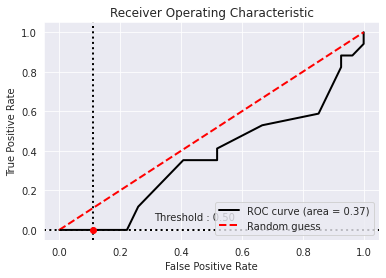

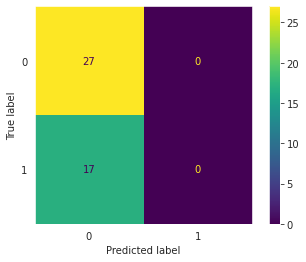

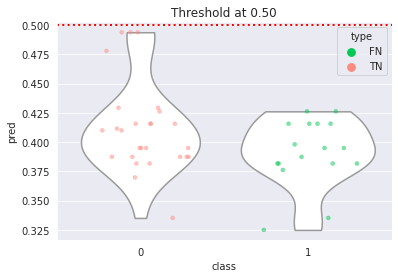

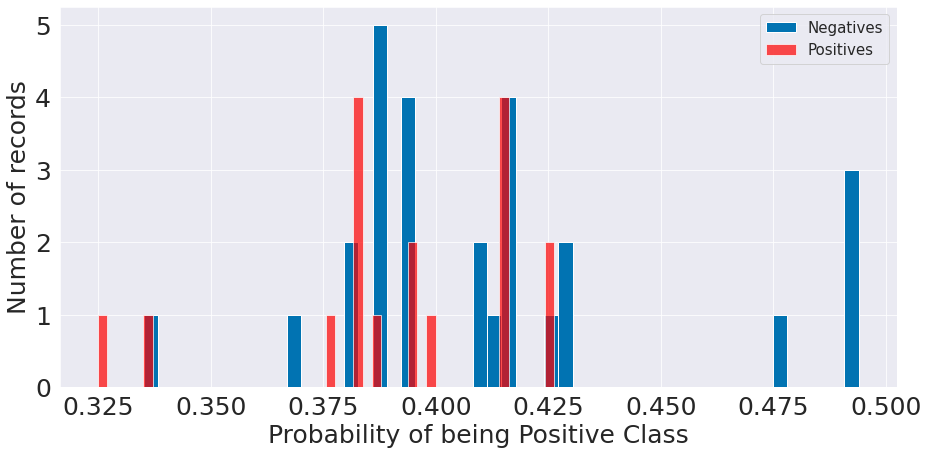

In [92]:
pred_label, pred_prob = get_evaluation(clf_xgb, valid_x, valid_y)

In [93]:
# y_test.tolist()
mismatch_inds = []
for i, x in enumerate(zip(valid_y.tolist(), pred_label)):
  if x[0] != x[1]:
    mismatch_inds.append(i)

for i in mismatch_inds:
  print(valid_y.index[i])

23
60
14
49
5
80
40
79
44
25
72
19
57
34
43
29
47


Aside: Supervised UMAP embedding (below two cells)

In [ ]:
embedding = umap.UMAP().fit_transform(umap_data, y=datadf['labels'])

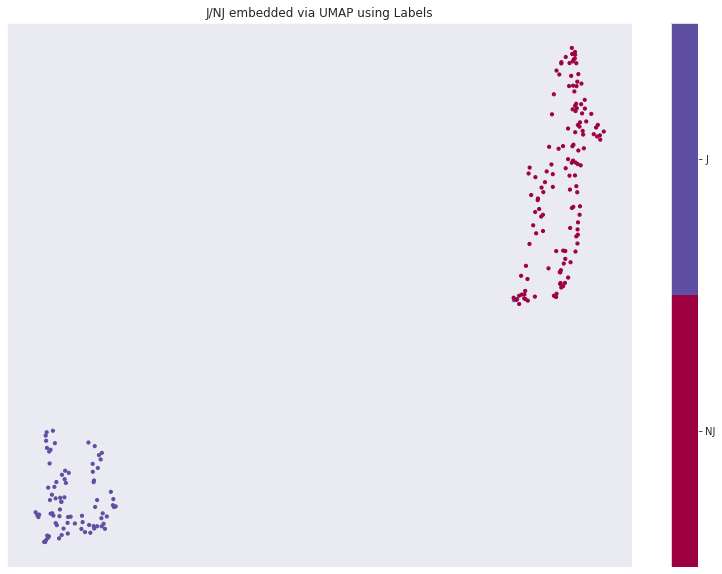

In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=10, c=datadf['labels'], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(classes)
plt.title('J/NJ embedded via UMAP using Labels');

## UMAP on PCA features

[0.67941546 0.83317983 0.87910135 0.90948071 0.92386705 0.93630014
 0.9480485  0.95305439 0.95784732 0.96185786 0.9652273  0.96816465
 0.97073716 0.97295888 0.9750503  0.97680398 0.97841617 0.9799406
 0.98127231 0.98255919 0.98367387 0.98472292 0.98565553 0.98647403
 0.98718013 0.9878471  0.98841849 0.98895571 0.98945488 0.98993363
 0.99039876 0.99083677 0.99126081 0.99168044 0.99206283 0.99241683
 0.99276537 0.99310051 0.99340097 0.99369055 0.99396674 0.99423317
 0.99449649 0.99474736 0.99498066 0.99520068 0.99540565 0.99560267
 0.99579423 0.99597786]


TypeError: ignored

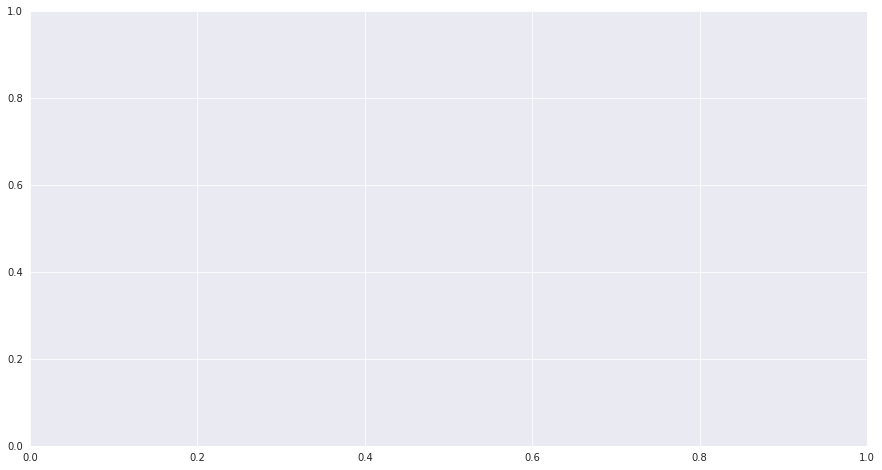

In [ ]:
data = np.vstack((jdata, njdata))

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=50)
components = pca.fit_transform(data_scaled)
print(np.cumsum(pca.explained_variance_ratio_))

classes = [
           'NJ',
           'J'
]
fit = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=15,
    metric='manhattan'
)
embedding = fit.fit_transform(components);
fig, ax = plt.subplots(1, figsize=(15, 8))
plt.scatter(*embedding.T, c=datadf['labels'], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(classes)
plt.title('J/NJ projection via PCA+UMAP');

In [ ]:
embedding.shape

(216, 15)

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(embedding, datadf['labels'], test_size=0.2, stratify=y)
# Takes a lot of time!
param_grid = {
    'max_depth': [6, 12, 15],
    'learning_rate': [0.001, 0.01, 0.1],
    'gamma': [0, 0.3, 0.9],
    'reg_lambda': [10, 100],
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                n_jobs=-1,
                                subsample=0.9,  # # subsample helps in overfitting and save some time -> it uses `subsample` fraction of data randomly.
                                early_stopping_rounds=10
),
    param_grid=param_grid,
    scoring='neg_log_loss',
    cv=3,
    verbose=True
)
optimal_params.fit(train_x,
                   train_y,
                   eval_set=[(valid_x, valid_y)]
)
print(optimal_params.best_params_)

# To prevent a memory leak warning, need to pass n_jobs=-1 to the classifier instead of GridSearchCV.

Streaming output truncated to the last 5000 lines.
[29]	validation_0-logloss:0.66710
[30]	validation_0-logloss:0.66660
[31]	validation_0-logloss:0.66670
[32]	validation_0-logloss:0.66578
[33]	validation_0-logloss:0.66506
[34]	validation_0-logloss:0.66434
[35]	validation_0-logloss:0.66352
[36]	validation_0-logloss:0.66262
[37]	validation_0-logloss:0.66169
[38]	validation_0-logloss:0.66090
[39]	validation_0-logloss:0.66093
[40]	validation_0-logloss:0.65989
[41]	validation_0-logloss:0.65971
[42]	validation_0-logloss:0.65950
[43]	validation_0-logloss:0.65993
[44]	validation_0-logloss:0.65937
[45]	validation_0-logloss:0.65896
[46]	validation_0-logloss:0.65832
[47]	validation_0-logloss:0.65756
[48]	validation_0-logloss:0.65774
[49]	validation_0-logloss:0.65796
[50]	validation_0-logloss:0.65705
[51]	validation_0-logloss:0.65683
[52]	validation_0-logloss:0.65687
[53]	validation_0-logloss:0.65712
[54]	validation_0-logloss:0.65642
[55]	validation_0-logloss:0.65618
[56]	validation_0-logloss:0.655

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.9,
                            learning_rate=0.1,
                            max_depth=6,
                            reg_lambda=100.0,
                            scale_pos_weight=ratio,  # Using the ratio instead of 7 obtained from cross-validation since using 3 gave better confusion matrix.
                            subsample=0.9,
                            early_stopping_rounds=10,
                            eval_metric=log_loss
)
clf_xgb.fit(train_x,
            train_y,
            verbose=True,
            eval_set=[(valid_x, valid_y)])

[0]	validation_0-logloss:0.69226	validation_0-log_loss:0.69226
[1]	validation_0-logloss:0.69147	validation_0-log_loss:0.69147
[2]	validation_0-logloss:0.69028	validation_0-log_loss:0.69028
[3]	validation_0-logloss:0.69009	validation_0-log_loss:0.69009
[4]	validation_0-logloss:0.68926	validation_0-log_loss:0.68926
[5]	validation_0-logloss:0.68844	validation_0-log_loss:0.68844
[6]	validation_0-logloss:0.68798	validation_0-log_loss:0.68798
[7]	validation_0-logloss:0.68797	validation_0-log_loss:0.68797
[8]	validation_0-logloss:0.68676	validation_0-log_loss:0.68676
[9]	validation_0-logloss:0.68667	validation_0-log_loss:0.68667
[10]	validation_0-logloss:0.68505	validation_0-log_loss:0.68505
[11]	validation_0-logloss:0.68473	validation_0-log_loss:0.68473
[12]	validation_0-logloss:0.68465	validation_0-log_loss:0.68464
[13]	validation_0-logloss:0.68415	validation_0-log_loss:0.68415
[14]	validation_0-logloss:0.68390	validation_0-log_loss:0.68390
[15]	validation_0-logloss:0.68306	validation_0-log

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=<function log_loss at 0x7fbc664bed40>, gamma=0.9,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=100.0, ...)

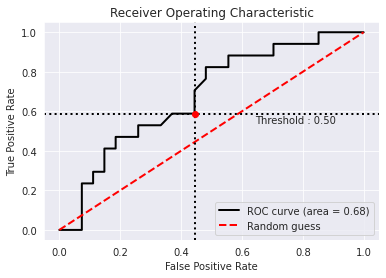

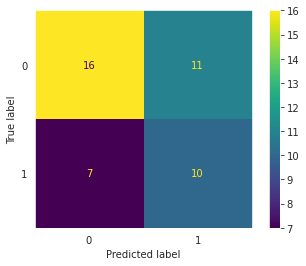

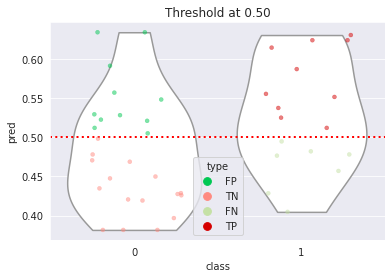

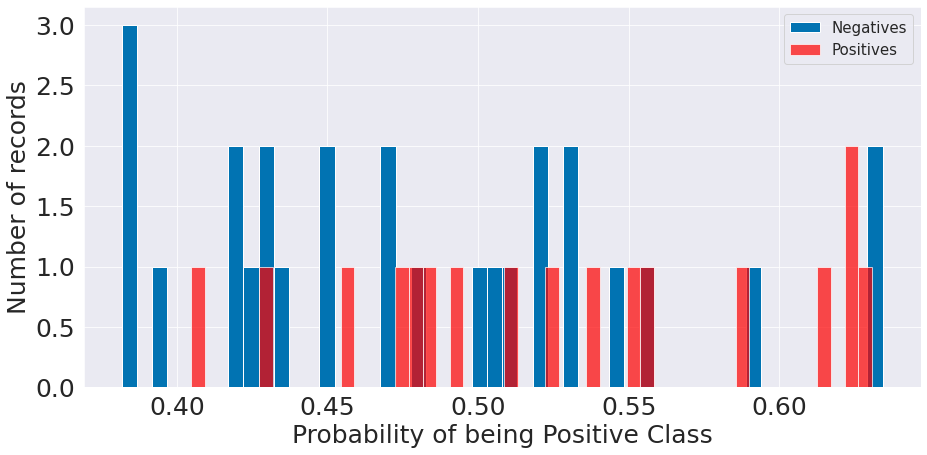

In [ ]:
get_evaluation(clf_xgb, valid_x, valid_y)

Supervised UMAP for metric learning

0.37790697674418644
0.3863636363636363


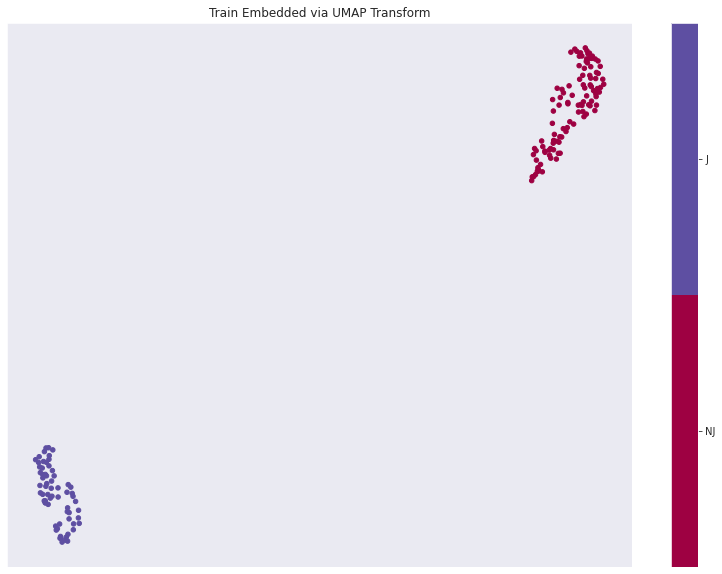

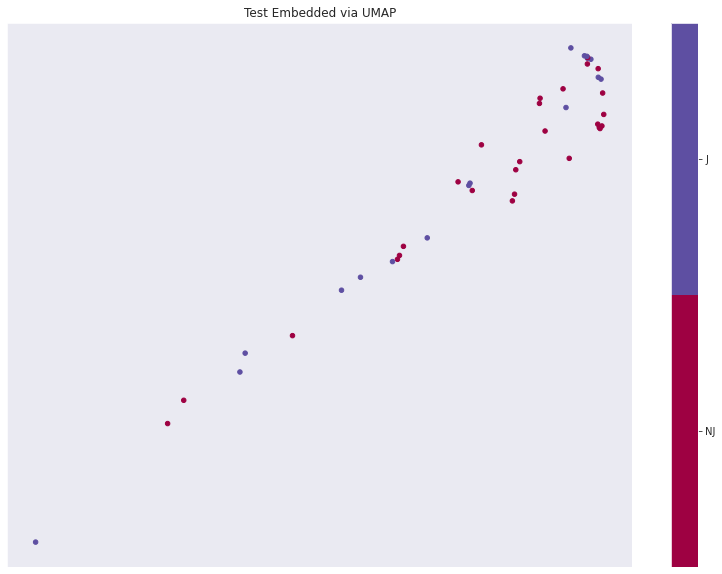

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(umap_data, datadf['labels'], test_size=0.2, stratify=datadf['labels'])

print(sum(train_y / len(train_y)))
print(sum(valid_y / len(valid_y)))

mapper = umap.UMAP(n_neighbors=20, metric='manhattan').fit(train_x, np.array(train_y))
test_embedding = mapper.transform(valid_x)

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mapper.embedding_.T, s=20, c=np.array(train_y), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(classes)
plt.title('Train Embedded via UMAP Transform');
plt.show()

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*test_embedding.T, s=20, c=np.array(valid_y), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(classes)
plt.title('Test Embedded via UMAP');

XGBoost on Autoencoder features

In [ ]:
import os
for f in exclude_jelly:
  os.remove(f)
for f in exclude_njelly_control:
  os.remove(f)
for f in exclude_njelly_sample:
  os.remove(f)

In [ ]:
##### Reference: https://stackoverflow.com/a/50260776 #####
import numpy as np
import cv2
from astropy.io import fits
from torchvision.datasets import DatasetFolder
from PIL import Image

class FitsFolder(DatasetFolder):

    EXTENSIONS = ['.fits']

    def __init__(self, root, transform=None, target_transform=None,
                 loader=None):
        if loader is None:
            loader = self.__fits_loader

        super(FitsFolder, self).__init__(root, loader, self.EXTENSIONS[0],  # 0th index corresponds to FITS.
                                         transform=transform,
                                         target_transform=target_transform)

    @staticmethod
    def __fits_loader(filename):
        # convert_to_tensor = transforms.ToTensor()
        data = fits.getdata(filename)
        data = data.astype(np.float32)
        data = torch.from_numpy(data)
        data = data[None, :, :]
        return data

import os
DATASET_PATH = '/content/xgboost_autoencoder_data'

os.mkdir(DATASET_PATH)
os.mkdir(DATASET_PATH+"/jelly")
os.mkdir(DATASET_PATH+"/non_jelly")

In [ ]:
import shutil

for f in glob.glob('galmask_cut_jelly_candidates/*_F660_*.fits'):
  shutil.copy(f, DATASET_PATH+"/jelly/"+f.split('/')[1])
for f in glob.glob('galmask_cut_non_jelly_sample/*_F660_*.fits'):
  shutil.copy(f, DATASET_PATH+"/non_jelly/"+f.split('/')[1])
for f in glob.glob('galmask_cut_non_jelly_control/*_F660_*.fits'):
  shutil.copy(f, DATASET_PATH+"/non_jelly/"+f.split('/')[1])

In [ ]:
dataset = FitsFolder(DATASET_PATH, transform=transforms.Compose([transforms.Normalize((0.5, ), (0.5,))]))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
len(dataloader.dataset)

216

In [ ]:
### Reference: https://github.com/rasbt/stat453-deep-learning-ss21/blob/main/L16/conv-autoencoder_mnist.ipynb ###

class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=(3, 3), stride=2, padding=1),
            nn.LeakyReLU(0.01),
            nn.Conv2d(16, 32, kernel_size=(3, 3), stride=2, padding=1),
            nn.LeakyReLU(0.01),
            nn.Conv2d(32, 64, stride=2, kernel_size=(3, 3), padding=1),
            nn.LeakyReLU(0.01),
            nn.Conv2d(64, 128, stride=1, kernel_size=(3, 3), padding=1),
            nn.Flatten(),
            nn.Linear(247808, 2)
        )

        self.decoder = nn.Sequential(
            nn.Linear(2, 247808),
            Reshape(-1, 128, 44, 44),
            nn.ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=1, padding=1),
            nn.LeakyReLU(0.01),
            nn.ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=2, padding=1),
            nn.LeakyReLU(0.01),
            nn.ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=2, padding=1, output_padding=1),
            nn.LeakyReLU(0.01),
            nn.ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=2, padding=0, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
model = Autoencoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=1e-3, weight_decay=1e-5,
)

In [ ]:
from torchsummary import summary

summary(model, (1, 350, 350))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 175, 175]             160
         LeakyReLU-2         [-1, 16, 175, 175]               0
            Conv2d-3           [-1, 32, 88, 88]           4,640
         LeakyReLU-4           [-1, 32, 88, 88]               0
            Conv2d-5           [-1, 64, 44, 44]          18,496
         LeakyReLU-6           [-1, 64, 44, 44]               0
            Conv2d-7          [-1, 128, 44, 44]          73,856
           Flatten-8               [-1, 247808]               0
            Linear-9                    [-1, 2]         495,618
           Linear-10               [-1, 247808]         743,424
          Reshape-11          [-1, 128, 44, 44]               0
  ConvTranspose2d-12           [-1, 64, 44, 44]          73,792
        LeakyReLU-13           [-1, 64, 44, 44]               0
  ConvTranspose2d-14           [-1, 32,

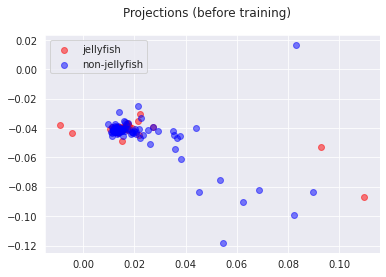

In [ ]:
before_encodings = []
labels = []

for img, target in dataloader:
    encode_vals = model.encoder(img)
    before_encodings.append(encode_vals.detach().numpy().squeeze())
    for batch_label in target:
        labels.append(batch_label)
before_encodings = np.vstack(before_encodings)
labels = np.array(labels)

j_before_encodings = before_encodings[labels==1]
nj_before_encodings = before_encodings[labels==0]

fig, ax = plt.subplots(1, 1)
fig.suptitle("Projections (before training)")
ax.scatter(j_before_encodings[:, 0], j_before_encodings[:, 1], c="red", label="jellyfish", alpha=0.5);
ax.scatter(nj_before_encodings[:, 0], nj_before_encodings[:, 1], c="blue", label="non-jellyfish", alpha=0.5);
ax.legend();
plt.savefig("autoencoder_before.png", bbox_inches='tight', dpi=500)

In [ ]:
j_before_encodings.shape, nj_before_encodings.shape

((82, 2), (134, 2))

In [ ]:
num_epochs = 20
outputs = []
losses = []
for epoch in range(num_epochs):
    train_loss = 0.0
    for (img, _) in dataloader:
        optimizer.zero_grad()
        recon = model(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * img.size(0)

    train_loss /= len(dataloader)

    print(f'Epoch:{epoch+1}, Loss:{train_loss}')
    losses.append(train_loss)
    outputs.append((epoch, img, recon))

Epoch:1, Loss:76.07176126752582
Epoch:2, Loss:58.366542543683735
Epoch:3, Loss:46.610154151916504
Epoch:4, Loss:42.720521790640696
Epoch:5, Loss:42.09601838248117
Epoch:6, Loss:42.06317070552281
Epoch:7, Loss:42.04787349700928
Epoch:8, Loss:42.02159118652344
Epoch:9, Loss:41.97903374263218
Epoch:10, Loss:41.970093863351
Epoch:11, Loss:41.96510492052351
Epoch:12, Loss:41.96154975891113
Epoch:13, Loss:41.95752280099051


KeyboardInterrupt: ignored

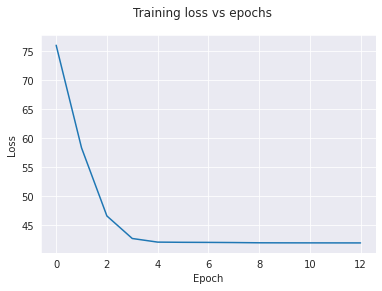

In [ ]:
fig, ax = plt.subplots(1, 1)

fig.suptitle("Training loss vs epochs");
ax.plot(losses);
ax.set_ylabel("Loss");
ax.set_xlabel("Epoch");

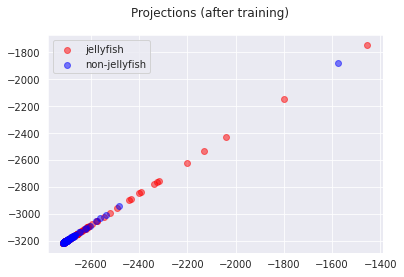

In [ ]:
after_encodings = []
labels = []

for img, target in dataloader:
    encode_vals = model.encoder(img)
    after_encodings.append(encode_vals.detach().numpy().squeeze())
    for batch_label in target:
        labels.append(batch_label)
after_encodings = np.vstack(after_encodings)
labels = np.array(labels)

j_after_encodings = after_encodings[labels==1]
nj_after_encodings = after_encodings[labels==0]

fig, ax = plt.subplots(1, 1)
fig.suptitle("Projections (after training)")
ax.scatter(j_after_encodings[:, 0], j_after_encodings[:, 1], c="red", label="jellyfish", alpha=0.5);
ax.scatter(nj_after_encodings[:, 0], nj_after_encodings[:, 1], c="blue", label="non-jellyfish", alpha=0.5);
ax.legend();

In [ ]:
j_after_encodings.shape, nj_after_encodings.shape, labels.shape

((134, 2), (82, 2), (216,))

In [ ]:
ae_embedding = np.vstack((j_after_encodings, nj_after_encodings))
train_x, valid_x, train_y, valid_y = train_test_split(ae_embedding, labels, test_size=0.2)
# Takes a lot of time!
param_grid = {
    'max_depth': [6, 12, 15],
    'learning_rate': [0.001, 0.01, 0.1],
    'gamma': [0, 0.3, 0.9],
    'reg_lambda': [10, 100],
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                n_jobs=-1,
                                subsample=0.9,  # # subsample helps in overfitting and save some time -> it uses `subsample` fraction of data randomly.
                                early_stopping_rounds=10,
                                min_delta_step=1,
                                scale_pos_weight=ratio
),
    param_grid=param_grid,
    scoring='neg_log_loss',
    cv=3,
    verbose=True
)
optimal_params.fit(train_x,
                   train_y,
                   eval_set=[(valid_x, valid_y)]
)
print(optimal_params.best_params_)

# To prevent a memory leak warning, need to pass n_jobs=-1 to the classifier instead of GridSearchCV.

Streaming output truncated to the last 5000 lines.
[72]	validation_0-logloss:0.69276
[73]	validation_0-logloss:0.69276
[74]	validation_0-logloss:0.69275
[75]	validation_0-logloss:0.69275
[76]	validation_0-logloss:0.69274
[77]	validation_0-logloss:0.69274
[78]	validation_0-logloss:0.69273
[79]	validation_0-logloss:0.69273
[80]	validation_0-logloss:0.69272
[81]	validation_0-logloss:0.69272
[82]	validation_0-logloss:0.69272
[83]	validation_0-logloss:0.69271
[84]	validation_0-logloss:0.69271
[85]	validation_0-logloss:0.69270
[86]	validation_0-logloss:0.69270
[87]	validation_0-logloss:0.69269
[88]	validation_0-logloss:0.69269
[89]	validation_0-logloss:0.69268
[90]	validation_0-logloss:0.69268
[91]	validation_0-logloss:0.69268
[92]	validation_0-logloss:0.69267
[93]	validation_0-logloss:0.69267
[94]	validation_0-logloss:0.69266
[95]	validation_0-logloss:0.69266
[96]	validation_0-logloss:0.69265
[97]	validation_0-logloss:0.69265
[98]	validation_0-logloss:0.69265
[99]	validation_0-logloss:0.692

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0,
                            learning_rate=0.1,
                            max_depth=6,
                            reg_lambda=100.0,
                            scale_pos_weight=ratio,  # Using the ratio instead of 7 obtained from cross-validation since using 3 gave better confusion matrix.
                            subsample=0.9,
                            early_stopping_rounds=10,
                            eval_metric=log_loss
)
clf_xgb.fit(train_x,
            train_y,
            verbose=True,
            eval_set=[(valid_x, valid_y)])

[0]	validation_0-logloss:0.69211	validation_0-log_loss:0.69211
[1]	validation_0-logloss:0.69178	validation_0-log_loss:0.69178
[2]	validation_0-logloss:0.69130	validation_0-log_loss:0.69130
[3]	validation_0-logloss:0.69113	validation_0-log_loss:0.69113
[4]	validation_0-logloss:0.69122	validation_0-log_loss:0.69122
[5]	validation_0-logloss:0.69150	validation_0-log_loss:0.69150
[6]	validation_0-logloss:0.69193	validation_0-log_loss:0.69193
[7]	validation_0-logloss:0.69259	validation_0-log_loss:0.69259
[8]	validation_0-logloss:0.69334	validation_0-log_loss:0.69334
[9]	validation_0-logloss:0.69424	validation_0-log_loss:0.69424
[10]	validation_0-logloss:0.69529	validation_0-log_loss:0.69529
[11]	validation_0-logloss:0.69633	validation_0-log_loss:0.69633
[12]	validation_0-logloss:0.69769	validation_0-log_loss:0.69769


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=<function log_loss at 0x7fbc664bed40>, gamma=0,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=100.0, ...)

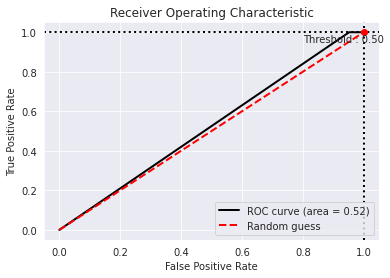

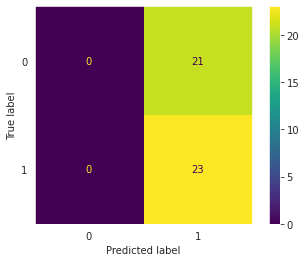

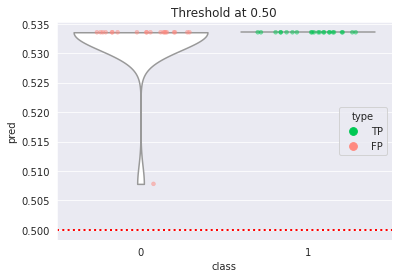

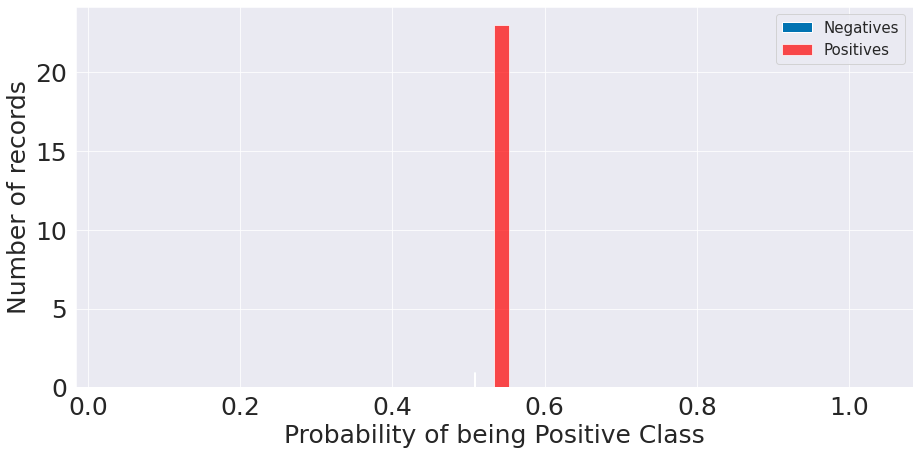

In [ ]:
get_evaluation(clf_xgb, valid_x, valid_y)

Future work:

- How do neural networks (specifically, CNNs) work with imbalanced data?
  - See http://203.170.84.89/~idawis33/DataScienceLab/publication/IJCNN15.wang.final.pdf for a start.